# CS 7310 Summer 2023: Final Assignment

## Predicting price per square foot using Linear Regression

In [9]:
# Name: Davis Vercher
# Student ID: 49377022

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [11]:
df = pd.read_csv('housing_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    414 non-null    int64  
 1   X1 date               414 non-null    float64
 2   X2 home age           414 non-null    float64
 3   X3 dist to station    414 non-null    float64
 4   X4 num nearby stores  414 non-null    int64  
 5   X5 latitude           414 non-null    float64
 6   X6 longitude          414 non-null    float64
 7   Y price per sqft      414 non-null    float64
 8   condition             414 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 29.2+ KB


,No,X1 date,X2 home age,X3 dist to station,X4 num nearby stores,X5 latitude,X6 longitude,Y price per sqft,condition
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Average
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Average
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,Average
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,Poor
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Excellent


C:\Users\Personal\AppData\Local\Temp\ipykernel_30420\3994441968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


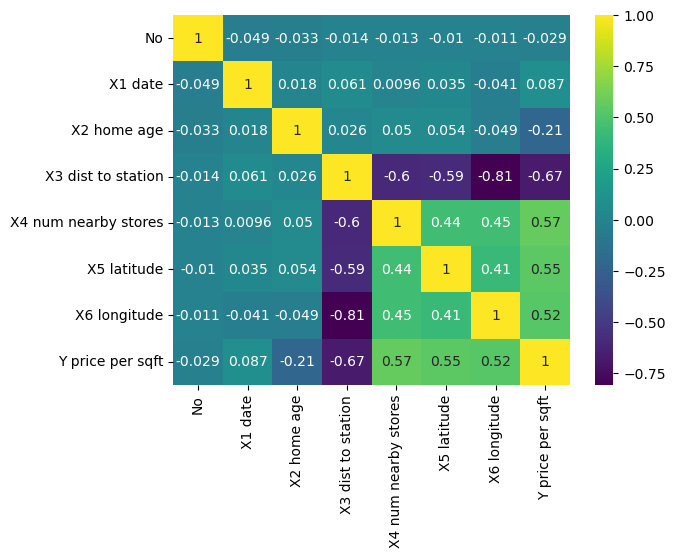

In [12]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='viridis')
plt.show()

In [13]:
df = df.drop(['No'], axis=1)

In [14]:
df.head()

,X1 date,X2 home age,X3 dist to station,X4 num nearby stores,X5 latitude,X6 longitude,Y price per sqft,condition
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Average
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Average
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,Average
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,Poor
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Excellent


In [15]:
print(df['condition'].value_counts())

Average      109
Excellent    106
Poor         105
Good          94
Name: condition, dtype: int64


In [16]:
df.replace({'condition': {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}}, inplace=True)
df.head()

,X1 date,X2 home age,X3 dist to station,X4 num nearby stores,X5 latitude,X6 longitude,Y price per sqft,condition
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3


In [17]:
X = df.drop(['Y price per sqft'], axis=1)
X.head()

,X1 date,X2 home age,X3 dist to station,X4 num nearby stores,X5 latitude,X6 longitude,condition
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1
1,2012.917,19.5,306.59470,9,24.98034,121.53951,1
2,2013.583,13.3,561.98450,5,24.98746,121.54391,1
3,2013.500,13.3,561.98450,5,24.98746,121.54391,0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,3


In [18]:
Y = df['Y price per sqft']
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y price per sqft, dtype: float64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [23]:
X_train.head(5)

,X1 date,X2 home age,X3 dist to station,X4 num nearby stores,X5 latitude,X6 longitude,condition
296,2012.750,12.5,1144.4360,4,24.99176,121.53456,1
292,2013.083,17.5,395.6747,5,24.95674,121.53400,0
59,2013.083,13.3,336.0532,5,24.95776,121.53438,3
216,2013.250,37.8,590.9292,1,24.97153,121.53559,1
74,2012.917,6.8,379.5575,10,24.98343,121.53762,3


In [24]:
X_test.head(5)

,X1 date,X2 home age,X3 dist to station,X4 num nearby stores,X5 latitude,X6 longitude,condition
258,2013.417,0.0,292.9978,6,24.97744,121.54458,0
109,2013.583,4.0,2147.3760,3,24.96299,121.51284,2
90,2012.833,0.0,274.0144,1,24.97480,121.53059,0
148,2013.500,16.4,3780.5900,0,24.93293,121.51203,3
388,2013.500,10.4,2251.9380,4,24.95957,121.51353,0


In [29]:
model = LinearRegression()
model.fit(X_train, Y_train)
print("Linear Regression model created")

Linear Regression model created


In [31]:
train_pred = model.predict(X_train)

In [32]:
train_r2 = metrics.r2_score(Y_train, train_pred)
print("R squared error for the training data: ", train_r2)

R squared error for the training data:  0.586563240932521


In [33]:
test_pred = model.predict(X_test)

In [34]:
test_r2 = metrics.r2_score(Y_test, test_pred)
print("R squared error for testing data: ", test_r2)

R squared error for testing data:  0.5516083640890179
